In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats
from ram.analysis.combo_search import CombinationSearch
from ram.utils.time_funcs import convert_date_array

In [2]:
RunManager.get_strategies()

['BirdsStrategy',
 'GapStrategy',
 'IntradayReversion',
 'LongPeadStrategy',
 'MomentumStrategy',
 'ReversionStrategy',
 'StatArbStrategy',
 'VictorStrategy']

In [3]:
print(RunManager.get_run_names('IntradayReversion'))

         Run                                        Description
0   run_0002                       zLim dwn up Pred fit Samples
1   run_0003                               RF Classifier params
2   run_0004                             Target Stopl Loss Lits
3   run_0005                               RF Classifier Iter 2
4   run_0007                       Rev zLim up down signal lims
5   run_0008                                Rev only RFC Params
6   run_0009                          Rev Only Stop Target Lims
7   run_0010                             RevMo Mixed Param Iter
8   run_0011                             RevMo All Params z .35
9   run_0012                        mitch: first run with main2
10  run_0013                           mitch: main2 more params
11  run_0014                         mitch: main2 running on PC
12  run_0015                                         Rand Preds
13  run_0016                              Non-Rand Pred Control
14  run_0017                            

In [4]:
rm1 = RunManager('IntradayReversion', 'run_0039', test_periods=0)
rm1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,participation_GLD,participation_IWM,participation_QQQ,participation_SPY,participation_TLT,...,total_return_QQQ,total_return_SPY,total_return_TLT,total_return_VXX,win_percent_GLD,win_percent_IWM,win_percent_QQQ,win_percent_SPY,win_percent_TLT,win_percent_VXX
0,GLD,"[0.01, 0.002]",11520,0.070377,0.019536,0.406571,0.319580,0.333178,0.438767,0.418549,...,0.062661,0.089383,0.014079,0.341006,0.286578,0.277699,0.323405,0.351132,0.359204,0.523718
1,GLD,"[0.01, 0.004]",11520,0.058671,0.015996,0.406571,0.319580,0.333178,0.438767,0.418549,...,0.062661,0.089383,0.014079,0.341006,0.414715,0.277699,0.323405,0.351132,0.359204,0.523718
2,IWM,"[0.01, 0.002]",11520,0.064411,0.018186,0.406571,0.319580,0.333178,0.438767,0.418549,...,0.062661,0.089383,0.014079,0.341006,0.350647,0.213940,0.323405,0.351132,0.359204,0.523718
3,IWM,"[0.01, 0.004]",11520,0.064638,0.017346,0.406571,0.319580,0.333178,0.438767,0.418549,...,0.062661,0.089383,0.014079,0.341006,0.350647,0.341459,0.323405,0.351132,0.359204,0.523718
4,QQQ,"[0.01, 0.002]",11520,0.061288,0.017379,0.406571,0.319580,0.333178,0.438767,0.418549,...,0.043961,0.089383,0.014079,0.341006,0.350647,0.277699,0.258979,0.351132,0.359204,0.523718
5,QQQ,"[0.01, 0.004]",11520,0.067761,0.018153,0.406571,0.319580,0.333178,0.438767,0.418549,...,0.081360,0.089383,0.014079,0.341006,0.350647,0.277699,0.387830,0.351132,0.359204,0.523718
6,SPY,"[0.01, 0.002]",11520,0.073912,0.020524,0.406571,0.319580,0.333178,0.438767,0.418549,...,0.062661,0.145692,0.014079,0.341006,0.350647,0.277699,0.323405,0.292052,0.359204,0.523718
7,SPY,"[0.01, 0.004]",11520,0.055137,0.015008,0.406571,0.319580,0.333178,0.438767,0.418549,...,0.062661,0.033074,0.014079,0.341006,0.350647,0.277699,0.323405,0.410212,0.359204,0.523718
8,TLT,"[0.01, 0.002]",11520,0.065699,0.018366,0.406571,0.319580,0.333178,0.438767,0.418549,...,0.062661,0.089383,0.021128,0.341006,0.350647,0.277699,0.323405,0.351132,0.291453,0.523718
9,TLT,"[0.01, 0.004]",11520,0.063349,0.017166,0.406571,0.319580,0.333178,0.438767,0.418549,...,0.062661,0.089383,0.007029,0.341006,0.350647,0.277699,0.323405,0.351132,0.426955,0.523718


In [5]:
comb = CombinationSearch()
comb.add_run(rm1)
comb.start(criteria='mean', epochs=4)

100%|███████████████████████████████████████████████████████████| 4/4 [02:06<00:00, 31.71s/it]


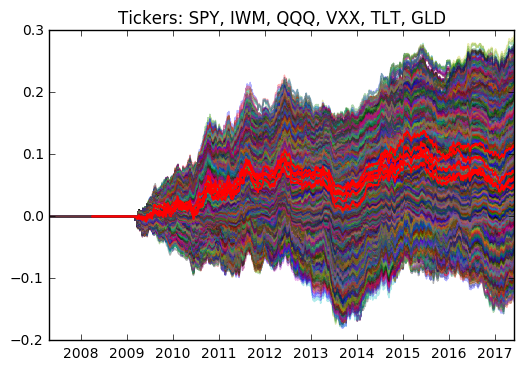

In [7]:
plt.figure()
plt.plot(rm1.returns.cumsum(), alpha=0.30)
plt.plot(comb.best_results_rets.cumsum(), 'r')
plt.title('Tickers: SPY, IWM, QQQ, VXX, TLT, GLD')

In [ ]:
comb.best_results_rets.sum()